In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# **1-Read a data**

In [7]:
train_data = pd.read_csv("/content/fraudTrain.csv")

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7815 entries, 0 to 7814
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             7815 non-null   int64  
 1   trans_date_trans_time  7815 non-null   object 
 2   cc_num                 7815 non-null   int64  
 3   merchant               7815 non-null   object 
 4   category               7815 non-null   object 
 5   amt                    7815 non-null   float64
 6   first                  7815 non-null   object 
 7   last                   7815 non-null   object 
 8   gender                 7814 non-null   object 
 9   street                 7814 non-null   object 
 10  city                   7814 non-null   object 
 11  state                  7814 non-null   object 
 12  zip                    7814 non-null   float64
 13  lat                    7814 non-null   float64
 14  long                   7814 non-null   float64
 15  city

In [9]:
train_data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,7815.00000,7.815000e+03,7815.000000,7814.000000,7814.000000,7814.000000,7.814000e+03,7.814000e+03,7814.000000,7814.000000,7814.000000
mean,3907.00000,4.078117e+17,68.661363,49479.396340,38.595821,-90.688408,8.823451e+04,1.325583e+09,38.599153,-90.685832,0.005759
std,2256.14051,1.295068e+18,115.530027,27184.827244,5.198199,14.512405,2.944470e+05,1.359720e+05,5.226026,14.532152,0.075673
min,0.00000,6.041621e+10,1.010000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.165823,-166.550779,0.000000
25%,1953.50000,1.800184e+14,9.785000,26041.000000,34.852700,-97.235100,7.410000e+02,1.325448e+09,34.913072,-97.322865,0.000000
50%,3907.00000,3.518759e+15,48.490000,49259.000000,39.376400,-87.764400,2.395000e+03,1.325583e+09,39.392224,-87.772889,0.000000
75%,5860.50000,4.653879e+15,82.220000,72476.000000,41.846700,-80.143075,1.905400e+04,1.325704e+09,41.923981,-80.187209,0.000000
max,7814.00000,4.992346e+18,3178.510000,99783.000000,65.689900,-67.950300,2.906700e+06,1.325815e+09,66.645176,-66.967742,1.000000


In [10]:
train_data.dtypes

,0
Unnamed: 0,int64
trans_date_trans_time,object
cc_num,int64
merchant,object
category,object
amt,float64
first,object
last,object
gender,object
street,object


In [11]:
train_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

# **2-Preprocessing**

In [12]:
train_data["trans_date_trans_time"] = pd.to_datetime(train_data["trans_date_trans_time"])
train_data["dob"] = pd.to_datetime(train_data["dob"])
train_data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7810,7810,2019-01-06 01:59:19,6524376634971418,fraud_Murray-Smitham,grocery_pos,132.27,Jasmine,Foster,F,954 White Alley Apt. 251,...,34.3470,-87.7154,5778.0,"Engineer, aeronautical",1952-12-05,e11d567d20b74f412c644122f57b7152,1.325815e+09,34.011938,-88.080823,0.0
7811,7811,2019-01-06 01:59:25,2348245054386329,fraud_Hackett-Lueilwitz,grocery_pos,83.51,Justin,Gay,M,268 Hayes Rue Suite 811,...,42.1767,-79.9416,2518.0,Event organiser,1946-02-02,dc5380f7b501f8fae23741ae9426ea87,1.325815e+09,41.328228,-79.226936,0.0
7812,7812,2019-01-06 02:00:33,2283743876903625,fraud_Koepp-Witting,grocery_pos,64.04,Shannon,Williams,F,9345 Spencer Junctions Suite 183,...,34.0770,-84.3033,165556.0,Prison officer,1997-12-27,eefe1322ac9155ed949e3c71b35ccc37,1.325815e+09,33.376781,-83.592263,0.0
7813,7813,2019-01-06 02:01:43,213195754007681,"fraud_Robel, Cummerata and Prosacco",gas_transport,66.86,Zachary,Allen,M,69252 Oconnor Alley Apt. 153,...,41.2001,-92.1354,568.0,Commercial horticulturist,1969-07-24,bb4b4d3d673dddf931fc71c12e090b1d,1.325815e+09,40.955293,-92.395676,0.0


In [13]:
train_data.drop(columns=['Unnamed: 0','cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num','trans_date_trans_time'],inplace=True)
train_data

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495.0,"Psychologist, counselling",1.325376e+09,36.011293,-82.048315,0.0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149.0,Special educational needs teacher,1.325376e+09,49.159047,-118.186462,0.0
2,fraud_Lind-Buckridge,entertainment,220.11,M,42.1808,-112.2620,4154.0,Nature conservation officer,1.325376e+09,43.150704,-112.154481,0.0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.2306,-112.1138,1939.0,Patent attorney,1.325376e+09,47.034331,-112.561071,0.0
4,fraud_Keeling-Crist,misc_pos,41.96,M,38.4207,-79.4629,99.0,Dance movement psychotherapist,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7810,fraud_Murray-Smitham,grocery_pos,132.27,F,34.3470,-87.7154,5778.0,"Engineer, aeronautical",1.325815e+09,34.011938,-88.080823,0.0
7811,fraud_Hackett-Lueilwitz,grocery_pos,83.51,M,42.1767,-79.9416,2518.0,Event organiser,1.325815e+09,41.328228,-79.226936,0.0
7812,fraud_Koepp-Witting,grocery_pos,64.04,F,34.0770,-84.3033,165556.0,Prison officer,1.325815e+09,33.376781,-83.592263,0.0
7813,"fraud_Robel, Cummerata and Prosacco",gas_transport,66.86,M,41.2001,-92.1354,568.0,Commercial horticulturist,1.325815e+09,40.955293,-92.395676,0.0


In [14]:
#Drop all rows that contain missing values
train_data.dropna(ignore_index=True)
train_data

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495.0,"Psychologist, counselling",1.325376e+09,36.011293,-82.048315,0.0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149.0,Special educational needs teacher,1.325376e+09,49.159047,-118.186462,0.0
2,fraud_Lind-Buckridge,entertainment,220.11,M,42.1808,-112.2620,4154.0,Nature conservation officer,1.325376e+09,43.150704,-112.154481,0.0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.2306,-112.1138,1939.0,Patent attorney,1.325376e+09,47.034331,-112.561071,0.0
4,fraud_Keeling-Crist,misc_pos,41.96,M,38.4207,-79.4629,99.0,Dance movement psychotherapist,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7810,fraud_Murray-Smitham,grocery_pos,132.27,F,34.3470,-87.7154,5778.0,"Engineer, aeronautical",1.325815e+09,34.011938,-88.080823,0.0
7811,fraud_Hackett-Lueilwitz,grocery_pos,83.51,M,42.1767,-79.9416,2518.0,Event organiser,1.325815e+09,41.328228,-79.226936,0.0
7812,fraud_Koepp-Witting,grocery_pos,64.04,F,34.0770,-84.3033,165556.0,Prison officer,1.325815e+09,33.376781,-83.592263,0.0
7813,"fraud_Robel, Cummerata and Prosacco",gas_transport,66.86,M,41.2001,-92.1354,568.0,Commercial horticulturist,1.325815e+09,40.955293,-92.395676,0.0


In [15]:
train_data.dropna(ignore_index=True)

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495.0,"Psychologist, counselling",1.325376e+09,36.011293,-82.048315,0.0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149.0,Special educational needs teacher,1.325376e+09,49.159047,-118.186462,0.0
2,fraud_Lind-Buckridge,entertainment,220.11,M,42.1808,-112.2620,4154.0,Nature conservation officer,1.325376e+09,43.150704,-112.154481,0.0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.2306,-112.1138,1939.0,Patent attorney,1.325376e+09,47.034331,-112.561071,0.0
4,fraud_Keeling-Crist,misc_pos,41.96,M,38.4207,-79.4629,99.0,Dance movement psychotherapist,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7809,fraud_Bernhard Inc,gas_transport,41.28,M,35.2563,-111.9500,759.0,"Geologist, engineering",1.325815e+09,34.964059,-111.203646,0.0
7810,fraud_Murray-Smitham,grocery_pos,132.27,F,34.3470,-87.7154,5778.0,"Engineer, aeronautical",1.325815e+09,34.011938,-88.080823,0.0
7811,fraud_Hackett-Lueilwitz,grocery_pos,83.51,M,42.1767,-79.9416,2518.0,Event organiser,1.325815e+09,41.328228,-79.226936,0.0
7812,fraud_Koepp-Witting,grocery_pos,64.04,F,34.0770,-84.3033,165556.0,Prison officer,1.325815e+09,33.376781,-83.592263,0.0


In [16]:
encoder = LabelEncoder()
train_data["merchant"] = encoder.fit_transform(train_data["merchant"])
train_data["category"] = encoder.fit_transform(train_data["category"])
train_data["gender"] = encoder.fit_transform(train_data["gender"])
train_data["job"] = encoder.fit_transform(train_data["job"])

In [17]:
train_data

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,514,8,4.97,0,36.0788,-81.1781,3495.0,354,1.325376e+09,36.011293,-82.048315,0.0
1,241,4,107.23,0,48.8878,-118.2105,149.0,409,1.325376e+09,49.159047,-118.186462,0.0
2,390,0,220.11,1,42.1808,-112.2620,4154.0,293,1.325376e+09,43.150704,-112.154481,0.0
3,360,2,45.00,1,46.2306,-112.1138,1939.0,314,1.325376e+09,47.034331,-112.561071,0.0
4,297,9,41.96,1,38.4207,-79.4629,99.0,110,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7810,447,4,132.27,0,34.3470,-87.7154,5778.0,146,1.325815e+09,34.011938,-88.080823,0.0
7811,217,4,83.51,1,42.1767,-79.9416,2518.0,177,1.325815e+09,41.328228,-79.226936,0.0
7812,329,4,64.04,0,34.0770,-84.3033,165556.0,336,1.325815e+09,33.376781,-83.592263,0.0
7813,518,2,66.86,1,41.2001,-92.1354,568.0,88,1.325815e+09,40.955293,-92.395676,0.0


# **3-EDA**

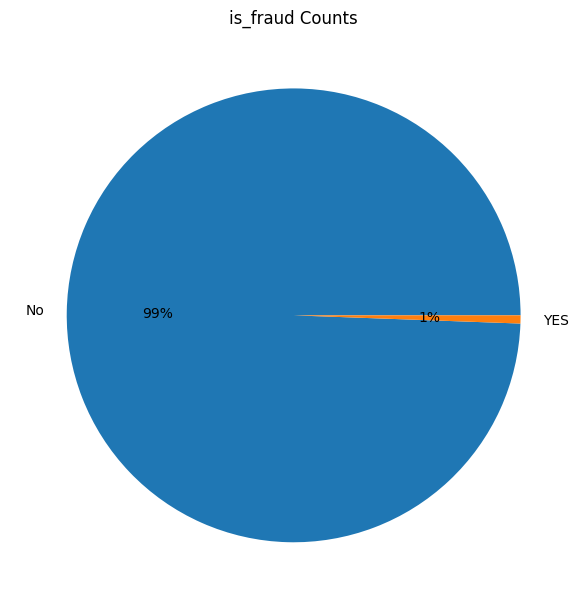

In [18]:
exit_counts = train_data["is_fraud"].value_counts()
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Subplot for the pie chart
plt.pie(exit_counts, labels=["No", "YES"], autopct="%0.0f%%")
plt.title("is_fraud Counts")
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

# **4-Train the Model**

In [19]:
X = train_data.drop(columns=["is_fraud"], inplace = False)
Y = train_data["is_fraud"]

In [37]:
X.dropna()

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long
0,514,8,4.97,0,36.0788,-81.1781,3495.0,354,1.325376e+09,36.011293,-82.048315
1,241,4,107.23,0,48.8878,-118.2105,149.0,409,1.325376e+09,49.159047,-118.186462
2,390,0,220.11,1,42.1808,-112.2620,4154.0,293,1.325376e+09,43.150704,-112.154481
3,360,2,45.00,1,46.2306,-112.1138,1939.0,314,1.325376e+09,47.034331,-112.561071
4,297,9,41.96,1,38.4207,-79.4629,99.0,110,1.325376e+09,38.674999,-78.632459
...,...,...,...,...,...,...,...,...,...,...,...
7809,47,2,41.28,1,35.2563,-111.9500,759.0,203,1.325815e+09,34.964059,-111.203646
7810,447,4,132.27,0,34.3470,-87.7154,5778.0,146,1.325815e+09,34.011938,-88.080823
7811,217,4,83.51,1,42.1767,-79.9416,2518.0,177,1.325815e+09,41.328228,-79.226936
7812,329,4,64.04,0,34.0770,-84.3033,165556.0,336,1.325815e+09,33.376781,-83.592263


In [39]:
# Drop rows with missing values from both X and Y
X = X.dropna()
Y = Y[X.index] # Align Y with the rows remaining in X

model = SVC()
model.fit(X, Y)

SVC()

In [40]:
model.score(X, Y)

0.9942411057077041

# **4-Test the model**

In [42]:
test_data = pd.read_csv("/content/fraudTest.csv")
test_data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7793,7793,2020-06-23 13:01:43,377113842678100,fraud_Fritsch and Sons,health_fitness,152.25,Billy,Gallagher,M,673 Delgado Burg,...,39.4055,-75.3209,804,Insurance risk surveyor,1965-03-25,f7acd865db256104d0ce1b8a1ffbae05,1.371993e+09,39.935513,-75.179333,0.0
7794,7794,2020-06-23 13:02:09,6538891242532018,"fraud_Torp, Muller and Borer",health_fitness,32.66,Jodi,Rodriguez,F,5796 Lee Coves Apt. 286,...,36.0244,-90.9288,7155,"Engineer, control and instrumentation",1977-03-23,6070406dc6dce186b67636e216419ead,1.371993e+09,35.702523,-90.870504,0.0
7795,7795,2020-06-23 13:02:35,4658117080136,fraud_Haley Group,misc_pos,8.50,Dwayne,Martinez,M,490 Baldwin Alley Apt. 468,...,35.7206,-108.0271,5662,IT consultant,1989-04-08,f36fdd434c182ce310169da03766f859,1.371993e+09,34.883752,-108.588882,0.0
7796,7796,2020-06-23 13:03:43,2720830304681674,fraud_Kozey-Kuhlman,personal_care,20.09,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,...,36.5220,-87.3490,151785,Pathologist,1974-03-28,f7a3f70dbbcca903324b9c22d98ffd47,1.371993e+09,36.373711,-87.343330,0.0


In [43]:
test_data.drop(columns=['Unnamed: 0','cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num','trans_date_trans_time'],inplace=True)
test_data

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,fraud_Kirlin and Sons,personal_care,2.86,M,33.9659,-80.9355,333497,Mechanical engineer,1.371817e+09,33.986391,-81.200714,0.0
1,fraud_Sporer-Keebler,personal_care,29.84,F,40.3207,-110.4360,302,"Sales professional, IT",1.371817e+09,39.450498,-109.960431,0.0
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,40.6729,-73.5365,34496,"Librarian, public",1.371817e+09,40.495810,-74.196111,0.0
3,fraud_Haley Group,misc_pos,60.05,M,28.5697,-80.8191,54767,Set designer,1.371817e+09,28.812398,-80.883061,0.0
4,fraud_Johnston-Casper,travel,3.19,M,44.2529,-85.0170,1126,Furniture designer,1.371817e+09,44.959148,-85.884734,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7793,fraud_Fritsch and Sons,health_fitness,152.25,M,39.4055,-75.3209,804,Insurance risk surveyor,1.371993e+09,39.935513,-75.179333,0.0
7794,"fraud_Torp, Muller and Borer",health_fitness,32.66,F,36.0244,-90.9288,7155,"Engineer, control and instrumentation",1.371993e+09,35.702523,-90.870504,0.0
7795,fraud_Haley Group,misc_pos,8.50,M,35.7206,-108.0271,5662,IT consultant,1.371993e+09,34.883752,-108.588882,0.0
7796,fraud_Kozey-Kuhlman,personal_care,20.09,F,36.5220,-87.3490,151785,Pathologist,1.371993e+09,36.373711,-87.343330,0.0


In [44]:
encoder = LabelEncoder()
test_data["merchant"] = encoder.fit_transform(test_data["merchant"])
test_data["category"] = encoder.fit_transform(test_data["category"])
test_data["gender"] = encoder.fit_transform(test_data["gender"])
test_data["job"] = encoder.fit_transform(test_data["job"])

In [45]:
test_data

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,319,10,2.86,1,33.9659,-80.9355,333497,274,1.371817e+09,33.986391,-81.200714,0.0
1,591,10,29.84,0,40.3207,-110.4360,302,390,1.371817e+09,39.450498,-109.960431,0.0
2,611,5,41.28,0,40.6729,-73.5365,34496,258,1.371817e+09,40.495810,-74.196111,0.0
3,222,9,60.05,1,28.5697,-80.8191,54767,405,1.371817e+09,28.812398,-80.883061,0.0
4,292,13,3.19,1,44.2529,-85.0170,1126,195,1.371817e+09,44.959148,-85.884734,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7793,185,5,152.25,1,39.4055,-75.3209,804,237,1.371993e+09,39.935513,-75.179333,0.0
7794,624,5,32.66,0,36.0244,-90.9288,7155,155,1.371993e+09,35.702523,-90.870504,0.0
7795,222,9,8.50,1,35.7206,-108.0271,5662,228,1.371993e+09,34.883752,-108.588882,0.0
7796,338,10,20.09,0,36.5220,-87.3490,151785,316,1.371993e+09,36.373711,-87.343330,0.0


In [46]:
X_test = test_data.drop(columns=["is_fraud"], inplace = False)
Y_test = test_data["is_fraud"]

In [49]:
X_test = X_test.dropna()
Y_test = Y_test[X_test.index]

In [50]:
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [52]:
accuracy = accuracy_score(Y_test,y_pred)
accuracy

0.9971784019494677

In [53]:
import joblib

# Save model
joblib.dump(model, "fraud_detection_model.pkl")

# Save label encoders for categorical columns
joblib.dump(encoder, "label_encoder.pkl")  # if using the same encoder for all


['label_encoder.pkl']

In [54]:
import pickle

pickle.dump(le_merchant, open("le_merchant.pkl", "wb"))
pickle.dump(le_category, open("le_category.pkl", "wb"))
pickle.dump(le_gender, open("le_gender.pkl", "wb"))
pickle.dump(le_job, open("le_job.pkl", "wb"))


NameError: name 'le_merchant' is not defined